<a href="https://colab.research.google.com/github/seunghee-lee/Portfolio/blob/main/Financial_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U finance-datareader
!pip install pandas-datareader
!pip install yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 581.5 kB/s eta 0:00:00


In [ ]:
import FinanceDataReader as fdr
import yfinance as yf
import seaborn as sns
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from datetime import datetime

In [ ]:
# Set the start and end date
start_date = '2000-01-01'
end_date = '2025-02-22'

In [ ]:
# 주가 데이터를 불러옴
# (yahoo finance open API, 공식적으로 없어졌지만, 비공식적으로 서비스는 제공되고 있음)

# Get the data
data1 = yf.download('^ks11', start_date, end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Print 5 rows
data1.tail()

Price,Close,High,Low,Open,Volume
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11
Date,,,,,
2025-02-17,2610.419922,2612.800049,2592.570068,2595.989990,366300
2025-02-18,2626.810059,2628.469971,2605.149902,2613.250000,422000
2025-02-19,2671.520020,2680.699951,2633.909912,2633.909912,525800
2025-02-20,2654.060059,2667.590088,2645.530029,2661.719971,529300
2025-02-21,2654.580078,2656.040039,2638.439941,2653.760010,444704


In [ ]:
data2 = fdr.DataReader('ks11', '2000')  #investing.com에서 코드를 확인하고 입력
data2.tail()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2025-02-17,2595.99,2612.80,2592.57,2610.42,366339998,0.0075,1,19.37,11017333473620,2.138576e+15
2025-02-18,2613.25,2628.47,2605.15,2626.81,421993118,0.0063,1,16.39,12618242477587,2.152415e+15
2025-02-19,2633.91,2680.70,2633.91,2671.52,525798791,0.0170,1,44.71,14851621874895,2.190321e+15
2025-02-20,2661.72,2667.59,2645.53,2654.06,529303324,-0.0065,2,-17.46,14551190986281,2.176899e+15
2025-02-21,2653.76,2656.04,2638.44,2654.58,444704240,0.0002,1,0.52,11381060470064,2.176175e+15


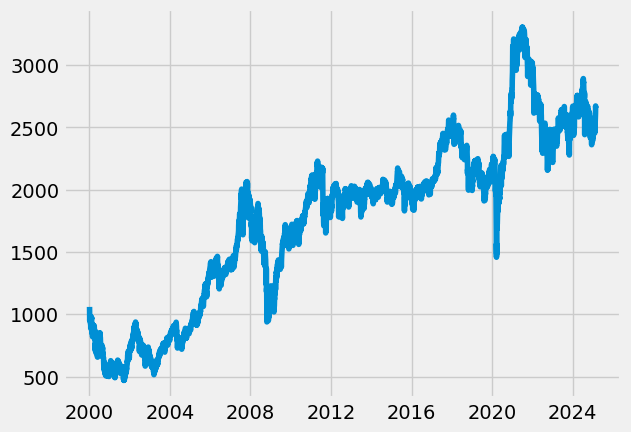

In [ ]:
datag1=data1[['Close']]
plt.plot(datag1)

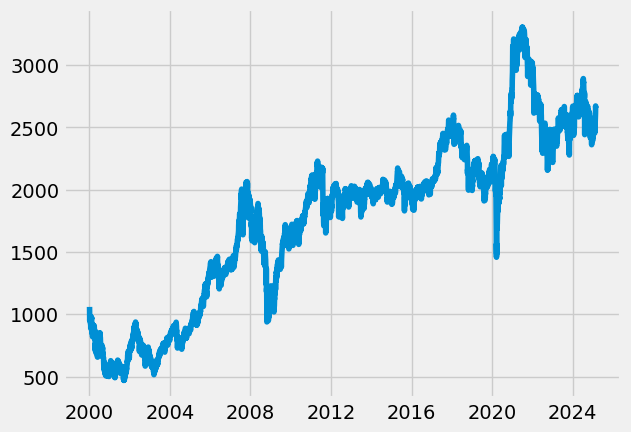

In [ ]:
datag2=data2[['Close']]
plt.plot(datag2)

In [ ]:
Kospi=data1

In [ ]:
Kospi['Return']=np.log(Kospi['Close']/Kospi['Close'].shift(1))

In [ ]:
Kospi.tail()

Price,Close,High,Low,Open,Volume,Return
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11,
Date,,,,,,
2025-02-17,2610.419922,2612.800049,2592.570068,2595.989990,366300,0.007448
2025-02-18,2626.810059,2628.469971,2605.149902,2613.250000,422000,0.006259
2025-02-19,2671.520020,2680.699951,2633.909912,2633.909912,525800,0.016877
2025-02-20,2654.060059,2667.590088,2645.530029,2661.719971,529300,-0.006557
2025-02-21,2654.580078,2656.040039,2638.439941,2653.760010,444704,0.000196


In [ ]:
Kospi.head()

Price,Close,High,Low,Open,Volume,Return
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11,
Date,,,,,,
2000-01-04,1059.040039,1066.180054,1016.590027,1028.329956,195900,NaN
2000-01-05,986.309998,1026.520020,984.049988,1006.869995,257700,-0.071147
2000-01-06,960.789978,1014.900024,953.500000,1013.950012,203500,-0.026215
2000-01-07,948.650024,970.159973,930.840027,949.169983,215700,-0.012716
2000-01-10,987.239990,994.940002,974.820007,979.669983,240200,0.039873


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

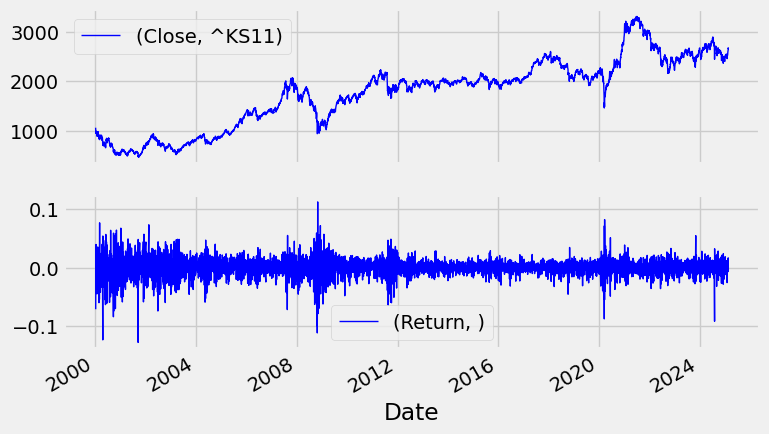

In [ ]:
Kospi[['Close','Return']].plot(subplots=True, style='b', lw='1', figsize=(8,5))

In [ ]:
Kospi['40d']=Kospi['Close'].rolling(window=40).mean()
Kospi['240d']=Kospi['Close'].rolling(window=240).mean()

In [ ]:
Kospi[['Close', '40d', '240d']].tail()

Price,Close,40d,240d
Ticker,^KS11,,
Date,,,
2025-02-17,2610.419922,2496.201990,2629.330001
2025-02-18,2626.810059,2499.510742,2629.200918
2025-02-19,2671.520020,2504.074493,2629.276792
2025-02-20,2654.060059,2509.005743,2629.234251
2025-02-21,2654.580078,2513.259497,2629.179585


<Axes: xlabel='Date'>

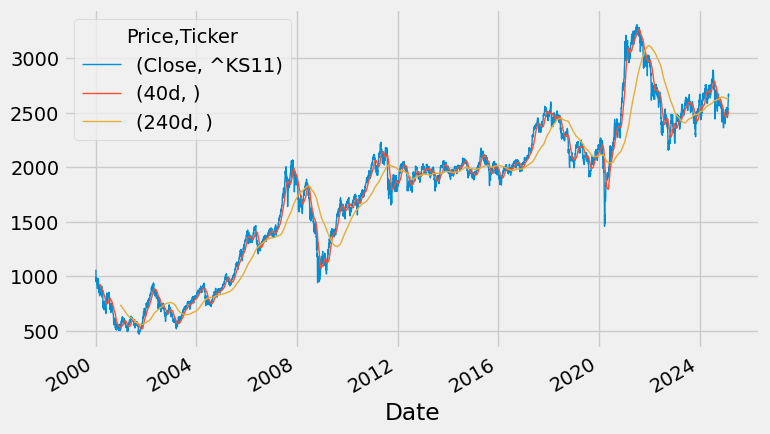

In [ ]:
Kospi[['Close', '40d', '240d']].plot(lw='1', figsize=(8,5))

In [ ]:
Kospi['Mov_vol']=Kospi['Return'].rolling(window=245).std()*math.sqrt(245)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

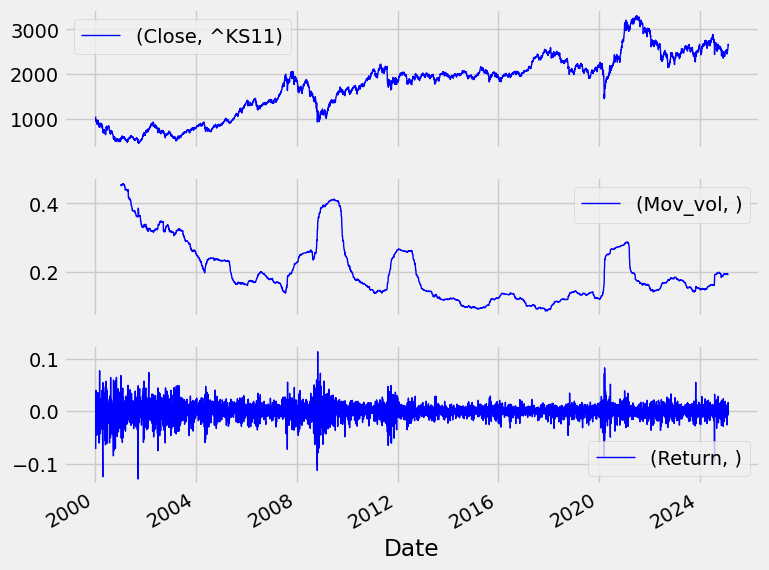

In [ ]:
Kospi[['Close','Mov_vol', 'Return']].plot(subplots=True, style='b', lw='1', figsize=(8,7))

In [ ]:
kospi = yf.download('^KS11', start_date, end_date)
snp = yf.download('^GSPC',start_date, end_date) #S&P500
nikkei = yf.download('^N225',start_date, end_date) # Nikkei 225
euronext = yf.download('^N100',start_date, end_date) # EURONEXT 100

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
snp.head()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000
2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000
2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000
2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000


In [ ]:
# 지수 자료를 병합
eqt1 = pd.merge(snp['Close'], kospi['Close'],left_index=True, right_index=True, how='inner')
eqt1.columns=['SP500','KOSPI']

eqt2 = pd.merge(nikkei['Close'], euronext['Close'],left_index=True, right_index=True, how='inner')
eqt2.columns=['Nikkei','Euronext']

eqt3 = pd.merge(eqt1, eqt2,left_index=True, right_index=True, how='inner')

In [ ]:
eqt3.head()

,SP500,KOSPI,Nikkei,Euronext
Date,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971
2000-01-05,1402.109985,986.309998,18542.550781,930.260010
2000-01-06,1403.449951,960.789978,18168.269531,922.460022
2000-01-07,1441.469971,948.650024,18193.410156,943.880005
2000-01-11,1438.560059,981.330017,18850.919922,954.059998


In [ ]:
rtn= ( np.log(eqt3) - np.log(eqt3.shift(1)) )*100
rtn.columns=['r_sp','r_kp','r_nk','r_ux']
rtn.head()

,r_sp,r_kp,r_nk,r_ux
Date,,,,
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,2.672995,-1.271589,0.138281,2.295501
2000-01-11,-0.202075,3.386886,3.550227,1.072752


In [ ]:
eqt = pd.merge(eqt3,rtn,left_index=True, right_index=True, how='inner')
eqt.head()

,SP500,KOSPI,Nikkei,Euronext,r_sp,r_kp,r_nk,r_ux
Date,,,,,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971,NaN,NaN,NaN,NaN
2000-01-05,1402.109985,986.309998,18542.550781,930.260010,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,1403.449951,960.789978,18168.269531,922.460022,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,1441.469971,948.650024,18193.410156,943.880005,2.672995,-1.271589,0.138281,2.295501
2000-01-11,1438.560059,981.330017,18850.919922,954.059998,-0.202075,3.386886,3.550227,1.072752


In [ ]:
pr = eqt[['SP500', 'KOSPI', 'Nikkei','Euronext']]
pr.head()

,SP500,KOSPI,Nikkei,Euronext
Date,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971
2000-01-05,1402.109985,986.309998,18542.550781,930.260010
2000-01-06,1403.449951,960.789978,18168.269531,922.460022
2000-01-07,1441.469971,948.650024,18193.410156,943.880005
2000-01-11,1438.560059,981.330017,18850.919922,954.059998


In [ ]:
rt = eqt[['r_sp','r_kp','r_nk','r_ux']]
rt.head()

,r_sp,r_kp,r_nk,r_ux
Date,,,,
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,2.672995,-1.271589,0.138281,2.295501
2000-01-11,-0.202075,3.386886,3.550227,1.072752


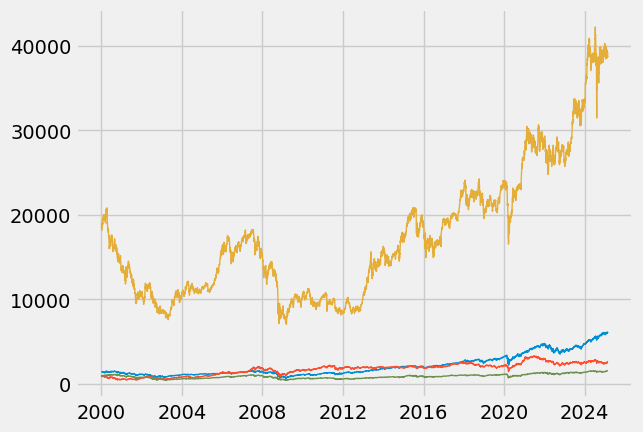

In [ ]:
# 원 자료로 그림을 그려 봄
plt.plot(pr, lw='1')

In [ ]:
# 초기시점을 0 으로 기준으로 잡고 상대 주가(relative stock price)를 표현
pr_0 = pr / pr.iloc[0] - 1.0

<Axes: xlabel='Date'>

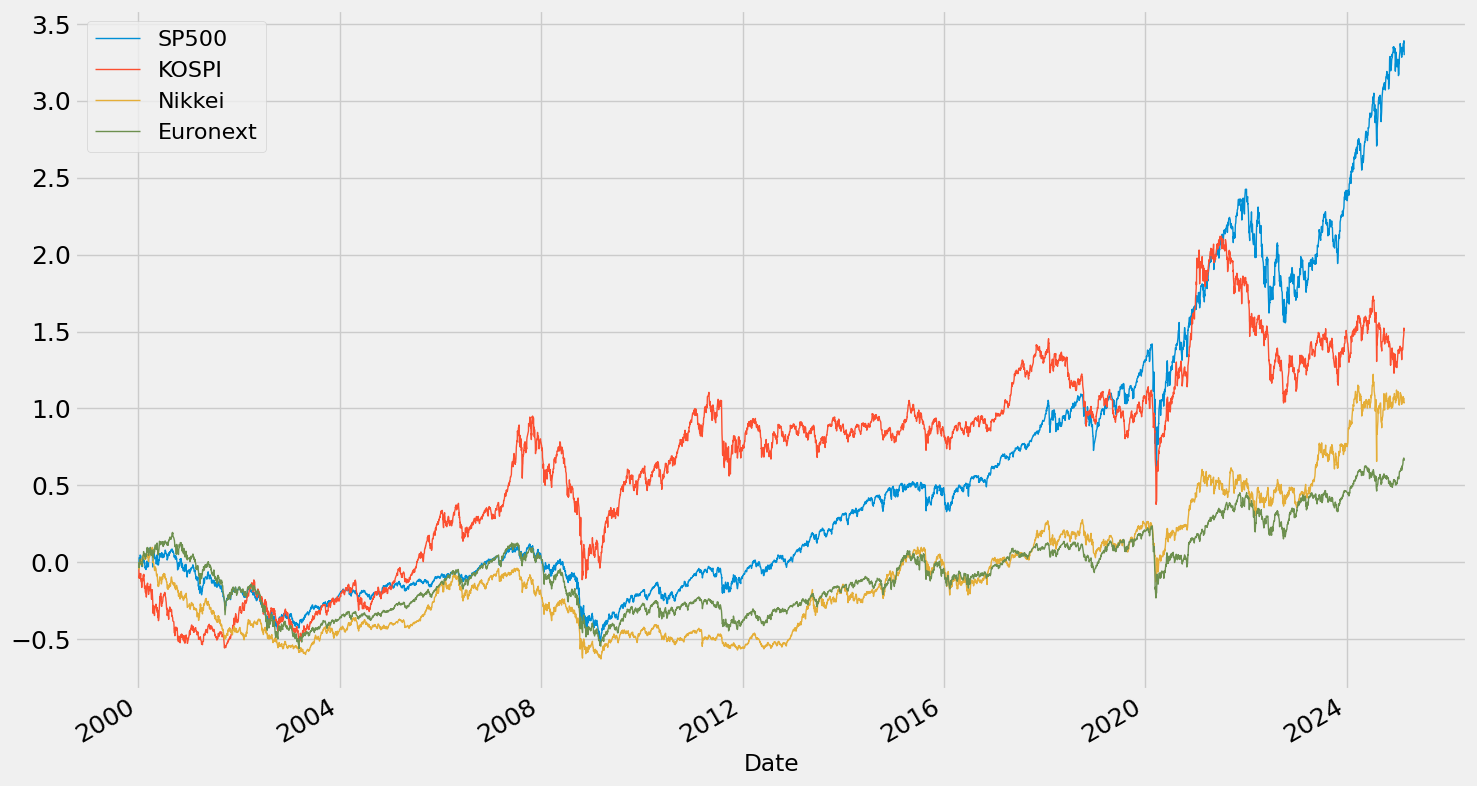

In [ ]:
# 상대가격을 그래프로 표현
plt.rcParams['legend.fontsize'] = 16
pr_0.plot( figsize=(16,10), fontsize=18, lw='1')

<Axes: xlabel='Date'>

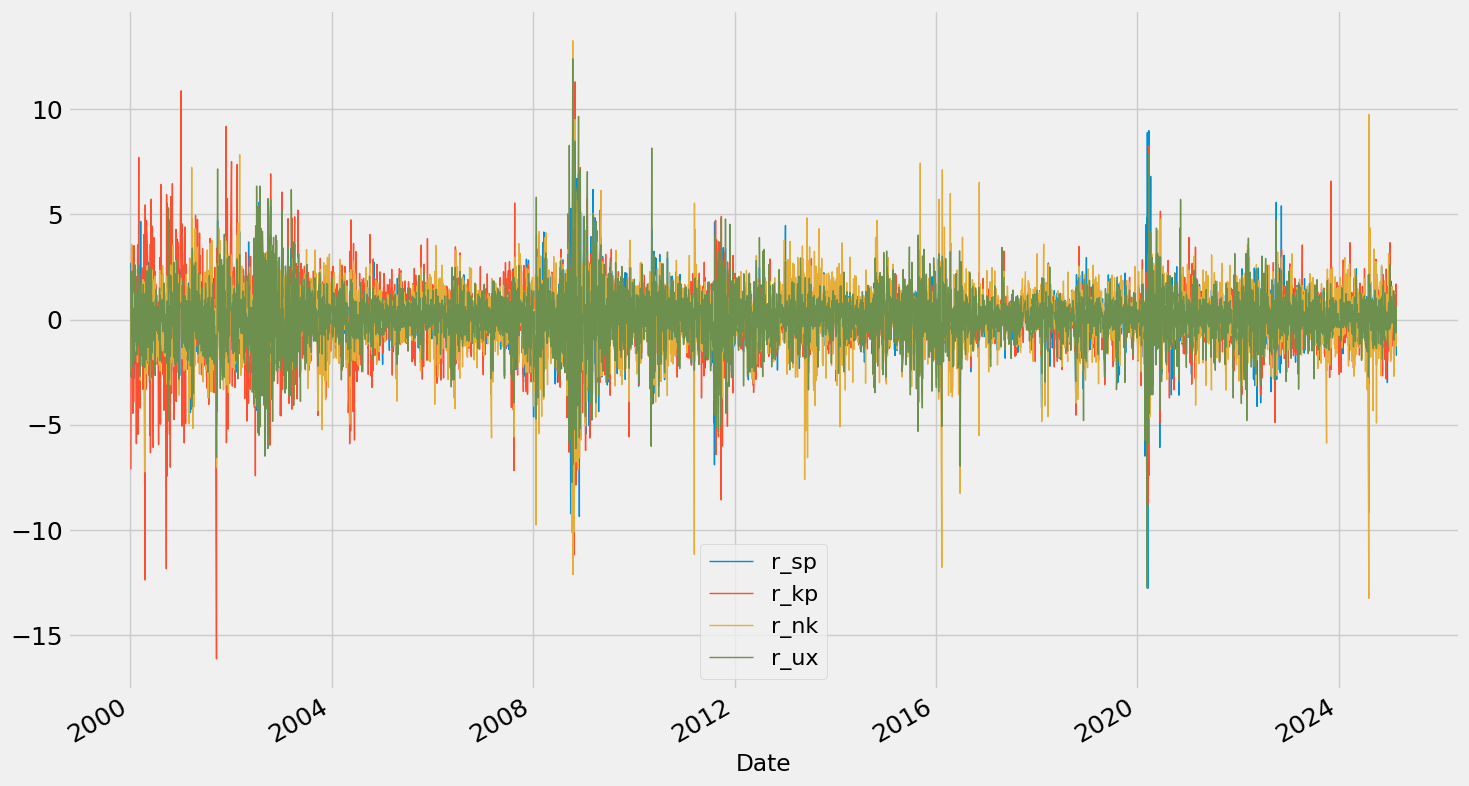

In [ ]:
#  수익률 그래프도 표현
plt.rcParams['legend.fontsize'] = 16
rt.plot( figsize=(16,10), lw='1', fontsize=18)

In [ ]:
pr.describe()

,SP500,KOSPI,Nikkei,Euronext
count,5641.000000,5641.000000,5641.000000,5641.000000
mean,2126.148477,1763.882395,17382.882030,898.913637
std,1268.589177,684.134215,7808.759070,254.610329
min,676.530029,468.760010,7054.979980,419.950012
25%,1200.859985,1227.189941,10823.570312,687.890015
50%,1492.250000,1933.089966,15821.519531,872.679993
75%,2767.129883,2188.919922,21620.880859,1046.869995
max,6144.149902,3305.209961,42224.019531,1603.819946


In [ ]:
rt.describe()

,r_sp,r_kp,r_nk,r_ux
count,5640.000000,5640.000000,5640.000000,5640.000000
mean,0.025849,0.016293,0.012646,0.009059
std,1.279418,1.526116,1.534304,1.344872
min,-12.765220,-16.115370,-13.234076,-12.751740
25%,-0.490202,-0.637159,-0.734419,-0.597666
50%,0.070393,0.070579,0.052395,0.061075
75%,0.612998,0.761399,0.836306,0.661269
max,10.423562,11.284352,13.234592,12.378520


In [ ]:
print(rt.describe())
print('skeness: ', rt.skew(axis=0))
print('kurtosis: ', rt.kurtosis(axis=0))

              r_sp         r_kp         r_nk         r_ux
count  5640.000000  5640.000000  5640.000000  5640.000000
mean      0.025849     0.016293     0.012646     0.009059
std       1.279418     1.526116     1.534304     1.344872
min     -12.765220   -16.115370   -13.234076   -12.751740
25%      -0.490202    -0.637159    -0.734419    -0.597666
50%       0.070393     0.070579     0.052395     0.061075
75%       0.612998     0.761399     0.836306     0.661269
max      10.423562    11.284352    13.234592    12.378520
skeness:  r_sp   -0.444248
r_kp   -0.603640
r_nk   -0.492851
r_ux   -0.137687
dtype: float64
kurtosis:  r_sp    9.913531
r_kp    9.089527
r_nk    7.309509
r_ux    7.454529
dtype: float64


In [ ]:
# 우리가 원하는 통계량이 모두 포함된 기초통계표를 만들음
df=pr
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              SP500          KOSPI        Nikkei      Euronext
count  5.641000e+03    5641.000000  5.641000e+03   5641.000000
mean   2.126148e+03    1763.882395  1.738288e+04    898.913637
std    1.268589e+03     684.134215  7.808759e+03    254.610329
min    6.765300e+02     468.760010  7.054980e+03    419.950012
25%    1.200860e+03    1227.189941  1.082357e+04    687.890015
50%    1.492250e+03    1933.089966  1.582152e+04    872.679993
75%    2.767130e+03    2188.919922  2.162088e+04   1046.869995
max    6.144150e+03    3305.209961  4.222402e+04   1603.819946
var    1.609319e+06  468039.624285  6.097672e+07  64826.419778
skew   1.246930e+00      -0.206088  1.020836e+00      0.539814
kurt   5.857440e-01      -0.770052  4.625804e-01     -0.377862


In [ ]:
df=rt
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              r_sp         r_kp         r_nk         r_ux
count  5640.000000  5640.000000  5640.000000  5640.000000
mean      0.025849     0.016293     0.012646     0.009059
std       1.279418     1.526116     1.534304     1.344872
min     -12.765220   -16.115370   -13.234076   -12.751740
25%      -0.490202    -0.637159    -0.734419    -0.597666
50%       0.070393     0.070579     0.052395     0.061075
75%       0.612998     0.761399     0.836306     0.661269
max      10.423562    11.284352    13.234592    12.378520
var       1.636909     2.329030     2.354088     1.808681
skew     -0.444248    -0.603640    -0.492851    -0.137687
kurt      9.913531     9.089527     7.309509     7.454529


In [ ]:
pr.corr()

,SP500,KOSPI,Nikkei,Euronext
SP500,1.000000,0.781066,0.962136,0.900315
KOSPI,0.781066,1.000000,0.713053,0.656691
Nikkei,0.962136,0.713053,1.000000,0.954046
Euronext,0.900315,0.656691,0.954046,1.000000


In [ ]:
rt.corr()

,r_sp,r_kp,r_nk,r_ux
r_sp,1.000000,0.233860,0.206191,0.602022
r_kp,0.233860,1.000000,0.609525,0.373882
r_nk,0.206191,0.609525,1.000000,0.395121
r_ux,0.602022,0.373882,0.395121,1.000000


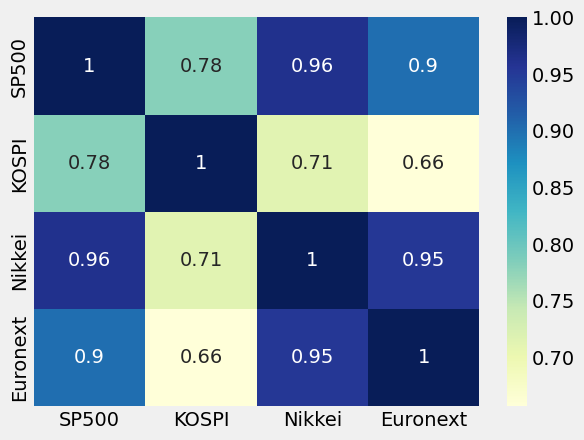

In [ ]:
sns.heatmap(pr.corr(), annot=True, cmap="YlGnBu")
plt.show()

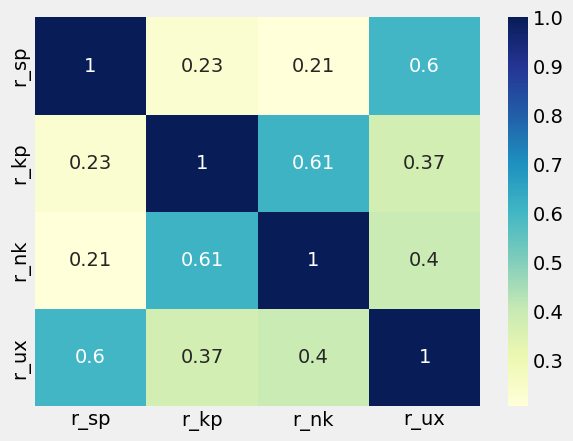

In [ ]:
sns.heatmap(rt.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
snp = yf.download('^GSPC',start_date, end_date) #S&P500 지수
vix = yf.download('^vix',start_date, end_date) #VIX 지수

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
data = pd.merge(snp['Close'], vix['Close'],left_index=True, right_index=True, how='inner')
data.columns=['SP500','VIX']

In [ ]:
data.tail()

,SP500,VIX
Date,,
2024-08-28,5592.180176,17.110001
2024-08-29,5591.959961,15.650000
2024-08-30,5648.399902,15.000000
2024-09-03,5528.930176,20.719999
2024-09-04,5520.069824,21.320000


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

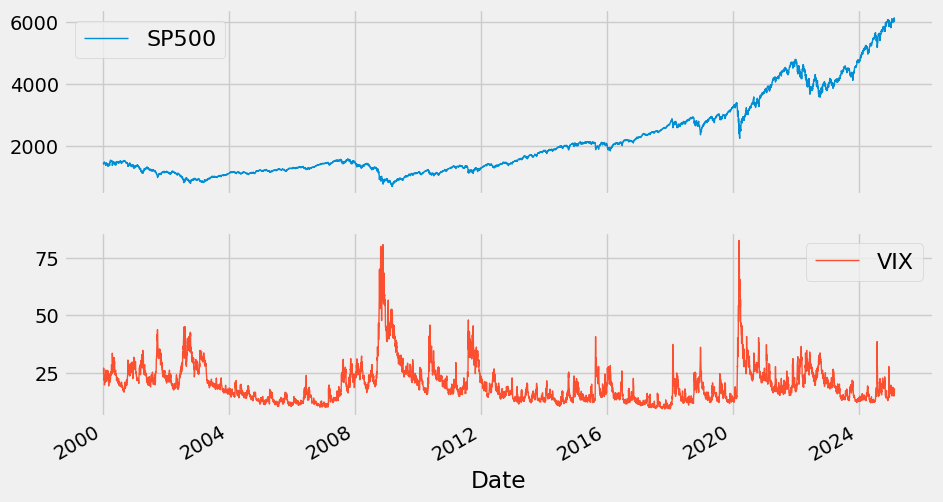

In [ ]:
data.plot(subplots=True, figsize=(10, 6), lw='1')

<Axes: xlabel='Date'>

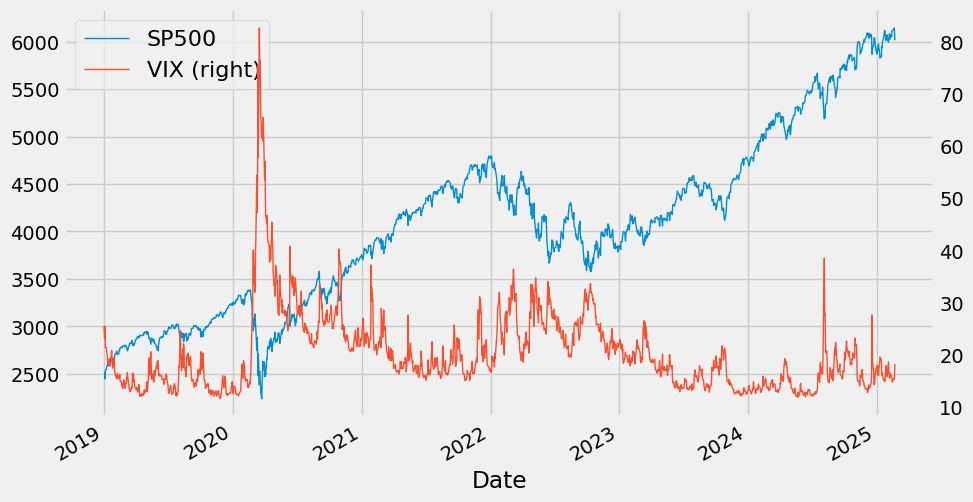

In [ ]:
data.loc['2018-12-31':].plot(secondary_y='VIX', figsize=(10, 6), lw='1')

In [ ]:
rets = np.log(data / data.shift(1))

In [ ]:
rets.head()

,SP500,VIX
Date,,
2000-01-03,NaN,NaN
2000-01-04,-0.039099,0.109441
2000-01-05,0.001920,-0.022464
2000-01-06,0.000955,-0.026085
2000-01-07,0.026730,-0.169424


In [ ]:
rets.dropna(inplace=True)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

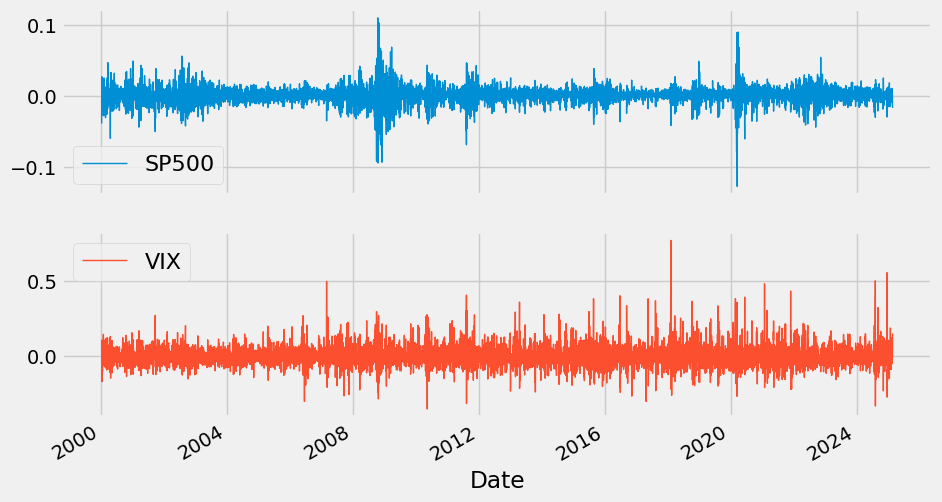

In [ ]:
rets.plot(subplots=True, figsize=(10, 6), lw='1')

array([[<Axes: xlabel='SP500', ylabel='SP500'>,
        <Axes: xlabel='VIX', ylabel='SP500'>],
       [<Axes: xlabel='SP500', ylabel='VIX'>,
        <Axes: xlabel='VIX', ylabel='VIX'>]], dtype=object)

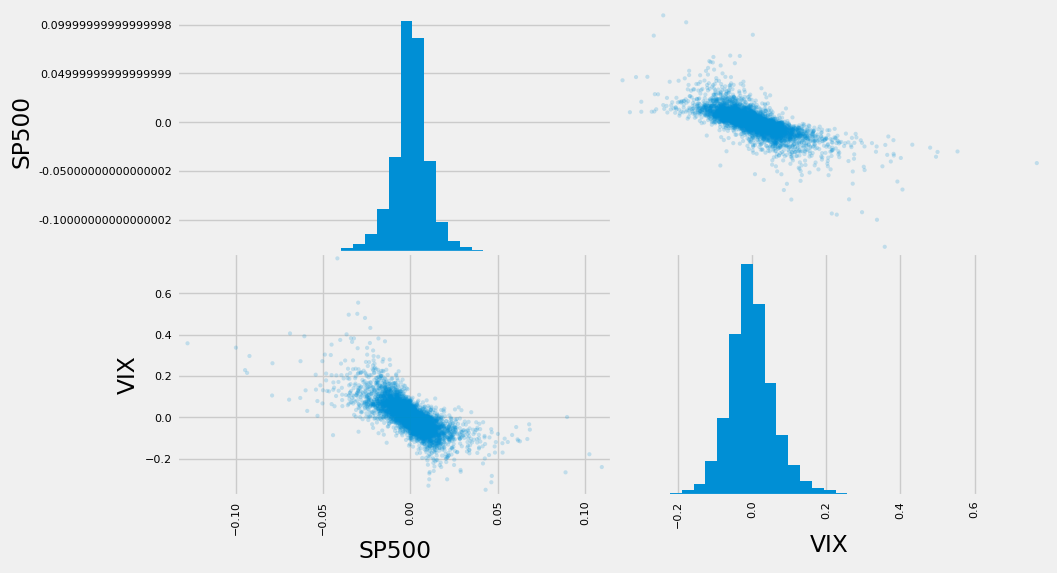

In [ ]:
pd.plotting.scatter_matrix(rets,
                           alpha=0.2,
                           diagonal='hist',
                           hist_kwds={'bins': 35},
                           figsize=(10, 6))

In [ ]:
reg = np.polyfit(rets['SP500'], rets['VIX'], deg=1)

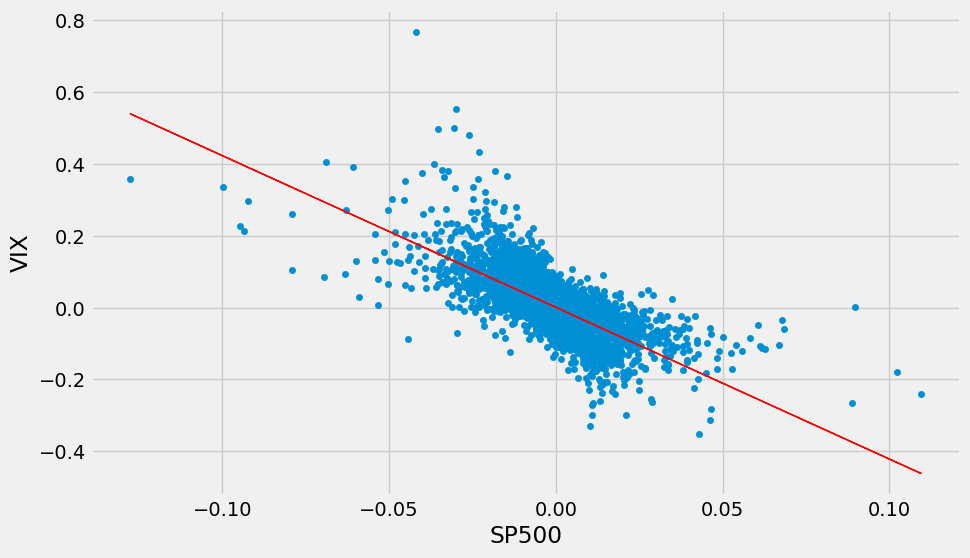

In [ ]:
ax = rets.plot(kind='scatter', x='SP500', y='VIX', figsize=(10, 6))
ax.plot(rets['SP500'], np.polyval(reg, rets['SP500']), 'r', lw='1')

In [ ]:
rets.corr()

,SP500,VIX
SP500,1.000000,-0.726297
VIX,-0.726297,1.000000


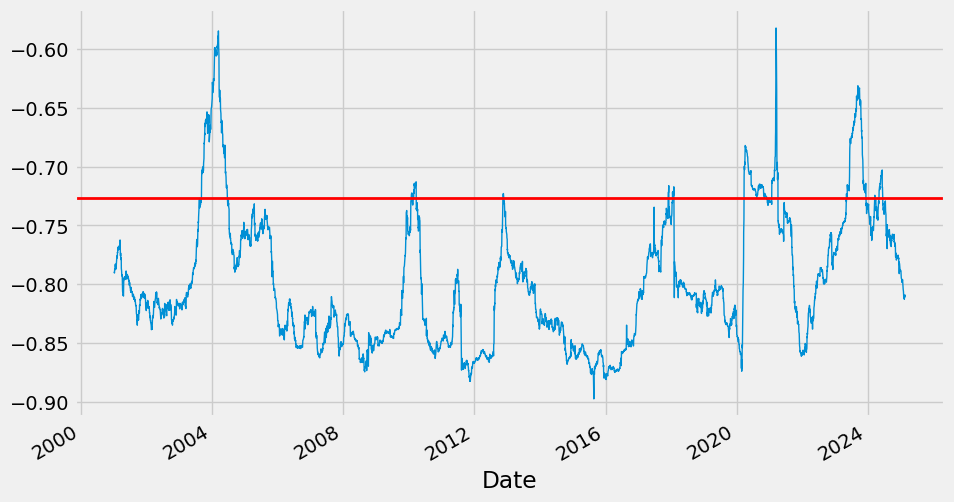

In [ ]:
ax = rets['SP500'].rolling(window=252).corr(
                  rets['VIX']).plot(figsize=(10, 6), lw='1')
ax.axhline(rets.corr().iloc[0, 1], c='r', lw='2')